# Titanic Survivors Data Analysis

Wokring with Titanic Data set from Kaggle, link provided above. This is a very famous data set and very often is a student's first step in machine learning!. 

We will be trying to predict classification - survival or deceased. Let's begin our understanding of implementing Logistic Regression in Python for classification.

We will use a semi-cleaned version of the titanic data set, if you use the data set hosted directly on kaggle, you may need to do some additional cleaning not shown in this lecture notebook.

# Import Libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
%matplotlib inline

import seaborn as sns
sns.set(style="white", color_codes=True)
sns.set(font_scale=1.5)

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import  f1_score
from sklearn import metrics

## Loading the Dataset Titanic


In [2]:
titanic = pd.read_csv("C:\\Users\\SHASHI\\OneDrive\\Desktop\\Python\\titanic.csv")

In [3]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# DIMENSION OF THE TITANIC DATASET

In [4]:
titanic.shape

(891, 12)

# DETAILS OF SURVIVED PASSENGERS

In [5]:
titanic.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

# DETAILS OF PASSENGERS MALE AND FEMALE

In [6]:
titanic.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

# PASSENGERS DETAILS BASED ON BOARDED CLASS TYPE

In [7]:
titanic.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

# FINDING MISSING VALUES

In [8]:
titanic.isnull().sum().any()

True

In [9]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# Dropping off the irrelevant columns which are no use for Prediction Analysis

In [10]:
titanic = titanic.drop(['PassengerId','Name','Ticket','Cabin'], axis=1)
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


# Imputation of Missing Data

Missing age data instead of dropping lets take the average age by Passenger Class.

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

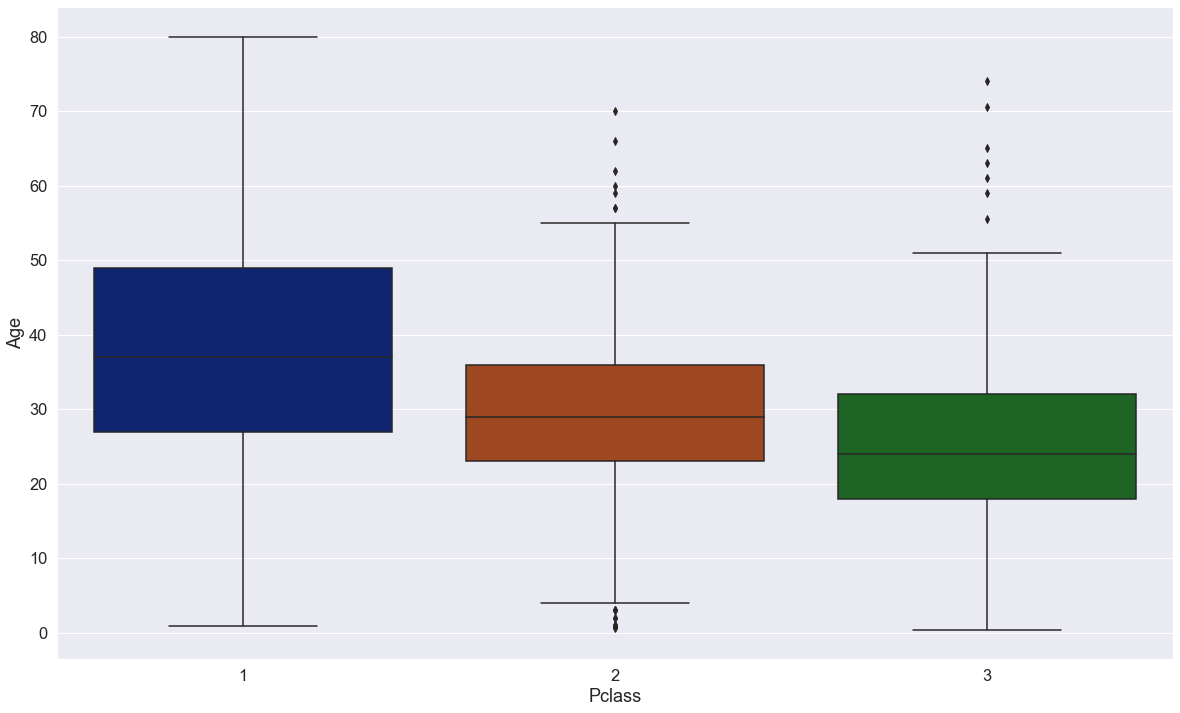

In [11]:
plt.figure(figsize = (20,12))
sns.boxplot(x = 'Pclass', y = 'Age', data = titanic, palette = 'dark')

As per above graph we observe that Pclass:1 average age is 38, Pclass:2 average age is 30, Pclass:3 average age is 25.

In [14]:
titanic.groupby(['Pclass']).mean()

,Survived,Age,SibSp,Parch,Fare
Pclass,,,,,
1,0.629630,38.233441,0.416667,0.356481,84.154687
2,0.472826,29.877630,0.402174,0.380435,20.662183
3,0.242363,25.140620,0.615071,0.393075,13.675550


In [15]:
def age_approx(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass ==1:
            return 38
        elif Pclass ==2:
               return 30
        else:
             return 25
    else:
        return Age

# Applying the function

In [16]:
titanic['Age'] = titanic[['Age','Pclass']].apply(age_approx, axis=1)

In [17]:
titanic.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [18]:
titanic['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [19]:
titanic.dropna(inplace=True)

In [20]:
titanic.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [21]:
titanic.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

In [22]:
titanic.shape

(889, 8)

In [23]:
titanic.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


# CONVERTING CATEGORICAL FEATURES

In [24]:
titanic_dummied = pd.get_dummies(titanic, columns=["Sex","Embarked"])

In [28]:
titanic_dummied.head(5)

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,1,0,0,1


# CREATE THE HEAT MAP

<AxesSubplot:>

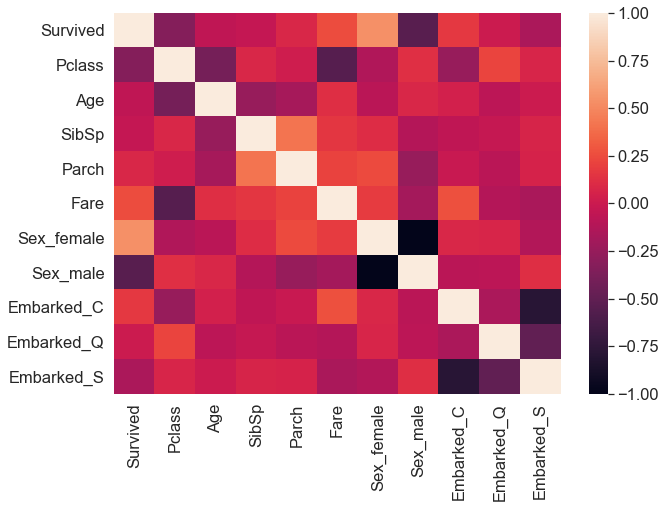

In [29]:
plt.figure(figsize=(10,7))
sns.heatmap(titanic_dummied.corr())

# Now the data is ready for the model

# Building the Logistic Regression Model

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [46]:
X = titanic_dummied.drop(["Survived","Fare"], axis=1)
y = titanic_dummied["Survived"]

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30, random_state=1)

# Checking the shape of the Train and Test Dataset

In [55]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(622, 9)
(267, 9)
(622,)
(267,)


In [56]:
lg = LogisticRegression()

In [57]:
lg.fit(X_train,y_train)

C:\Users\SHASHI\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [58]:
pred = lg.predict(X_test)

In [59]:
metrics.confusion_matrix(y_test,pred)

array([[143,  23],
       [ 22,  79]], dtype=int64)

In [60]:
metrics.accuracy_score(y_test,pred)

0.8314606741573034

In [61]:
len(X_test)

267

In [62]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.87      0.86      0.86       166
           1       0.77      0.78      0.78       101

    accuracy                           0.83       267
   macro avg       0.82      0.82      0.82       267
weighted avg       0.83      0.83      0.83       267



In [63]:
lg.coef_

array([[-1.04336706, -0.04026768, -0.24379629, -0.04145439,  1.19456246,
        -1.19331888,  0.34744461, -0.02568166, -0.32051937]])

In [64]:
lg.intercept_

array([3.68326445])

In [65]:
titanic_dummied.columns

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_female',
       'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype='object')

## Evaluation

We can check precision, recall, f1-score using classifiaction report!

In [66]:
from sklearn.metrics import classification_report

In [68]:
classification_report(y_test,pred)

'              precision    recall  f1-score   support\n\n           0       0.87      0.86      0.86       166\n           1       0.77      0.78      0.78       101\n\n    accuracy                           0.83       267\n   macro avg       0.82      0.82      0.82       267\nweighted avg       0.83      0.83      0.83       267\n'